In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/distan_lat43.302lon-8.377p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

**Load actual data (wind direction and wind speed) from station (dir -1 means variable direcction)**

In [2]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/LECOY2018Y2022.csv",
                          usecols = ["time","dir_o","spd_o"],
                          parse_dates=["time"]).set_index("time")
station.describe()

,dir_o,spd_o
count,89597.000000,89587.000000
mean,165.549349,3.104465
std,122.302169,2.091890
min,-1.000000,0.000000
25%,20.000000,1.543332
50%,180.000000,2.572220
75%,260.000000,4.115552
max,360.000000,16.462208


**Climatology labeled and relationship variable wind (VRB) and wind intensity**

In [3]:
#wind direction to interval dir=-1 variable wind
interval = pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])

labels = ['VRB', '[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]',
          '(100, 120]', '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]',
          '(200, 220]','(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]',
          '(300, 320]', '(320, 340]', '(340, 360]']

station["dir_l"] = pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")


#observed climatology
print("wind direction climatology\n")
print(station["dir_l"].value_counts(normalize= True).transform(lambda x: '{:,.0%}'.format(x)))

station["spd_o_kt"]=np.rint(station["spd_o"]*1.94384)
print("\nwind intensity percentage (kt) when wind variable\n")
print(station[station.dir_l=="VRB"]["spd_o_kt"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x)))
print("\nwind direction when wind speed equal or less than 3 kt\n")
station[station.spd_o_kt<=3]["dir_l"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x))


wind direction climatology

VRB           14%
(160, 180]    13%
[0, 20]       11%
(180, 200]    10%
(340, 360]    10%
(200, 220]     7%
(140, 160]     6%
(320, 340]     5%
(20, 40]       4%
(300, 320]     4%
(220, 240]     3%
(240, 260]     3%
(260, 280]     3%
(280, 300]     2%
(40, 60]       2%
(120, 140]     1%
(60, 80]       1%
(80, 100]      1%
(100, 120]     0%
Name: dir_l, dtype: object

wind intensity percentage (kt) when wind variable

2.0     52%
1.0     37%
3.0      4%
4.0      3%
5.0      2%
6.0      1%
7.0      1%
8.0      0%
9.0      0%
10.0     0%
11.0     0%
12.0     0%
14.0     0%
17.0     0%
21.0     0%
15.0     0%
24.0     0%
13.0     0%
18.0     0%
Name: spd_o_kt, dtype: object

wind direction when wind speed equal or less than 3 kt



VRB           44%
[0, 20]       15%
(160, 180]    10%
(180, 200]     7%
(140, 160]     5%
(340, 360]     3%
(320, 340]     3%
(300, 320]     2%
(20, 40]       2%
(200, 220]     2%
(280, 300]     1%
(120, 140]     1%
(260, 280]     1%
(220, 240]     1%
(240, 260]     1%
(40, 60]       1%
(100, 120]     1%
(60, 80]       1%
(80, 100]      1%
Name: dir_l, dtype: object

**Load meteorological model**

In [4]:
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,232.116882,0.0,1536.151245,6.673357,15.847702,102913.742188,287.020935,0.878536,24035.375000,14.237828,...,0.000000,-0.000438,0.000000,0.089097,0.000000,0.089097,5693.558105,1584.069946,254.864120,278.437256
2018-01-02 01:00:00,231.433868,0.0,1600.927490,7.663245,16.997808,102830.460938,287.384613,0.866039,24233.882812,18.512604,...,0.000000,-0.000438,0.000000,0.500000,0.200000,0.500000,5691.708008,1580.140015,254.976685,279.093506
2018-01-02 02:00:00,230.558472,0.0,1614.554321,7.296363,16.141504,102797.046875,287.456238,0.874109,24232.816406,16.743593,...,0.000000,-0.000105,0.000000,0.254035,0.343750,0.343750,5690.079102,1577.298950,255.064560,279.292755
2018-01-02 03:00:00,234.801254,0.0,1622.880859,6.550061,14.820992,102707.976562,287.640747,0.884587,4635.833984,15.291382,...,0.000000,-0.000125,0.289062,0.531250,0.734375,0.734375,5690.610840,1572.140015,254.839066,279.247864
2018-01-02 04:00:00,233.509735,0.0,1698.536133,7.280656,16.431499,102714.929688,287.973114,0.864839,24233.916016,19.287750,...,0.000000,0.000562,0.400000,0.656250,0.515625,0.656250,5690.393066,1574.123047,255.089691,280.121765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,222.438339,0.0,1413.273926,3.480232,8.724230,101416.109375,284.580383,0.828276,24046.664062,9.276939,...,69.529999,-15.124957,0.400000,0.000000,0.000000,0.400000,5472.100098,1437.536987,252.078400,275.643860
2023-01-01 20:00:00,236.080597,0.0,1425.150757,4.493026,9.884865,101530.671875,284.500244,0.859321,24048.144531,9.792046,...,118.860001,-13.584320,0.300000,0.000000,0.000000,0.300000,5467.734863,1445.677002,250.850891,275.983063
2023-01-01 21:00:00,243.114624,0.0,1374.339600,4.680808,9.837169,101588.718750,284.540619,0.847495,24051.210938,11.269343,...,155.720001,-13.667031,0.500000,0.200000,0.000000,0.500000,5461.733887,1450.810913,249.648865,275.520691


**Delete rows with wind direction variable obseved**

In [5]:
#concat station vs meteorological  model. Delete variable (VRB) observed direction
df_vrb = pd.concat([station,model1k],axis=1).drop(columns=["spd_o","spd_o_kt"]).dropna()
df_all1k = df_vrb[df_vrb.dir_o!=-1]
df_all1k

,dir_o,dir_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,250.0,"(240, 260]",232.116882,0.0,1536.151245,6.673357,15.847702,102913.742188,287.020935,0.878536,...,0.00,-0.000438,0.000000,0.089097,0.000000,0.089097,5693.558105,1584.069946,254.864120,278.437256
2018-01-02 01:00:00,240.0,"(220, 240]",231.433868,0.0,1600.927490,7.663245,16.997808,102830.460938,287.384613,0.866039,...,0.00,-0.000438,0.000000,0.500000,0.200000,0.500000,5691.708008,1580.140015,254.976685,279.093506
2018-01-02 02:00:00,240.0,"(220, 240]",230.558472,0.0,1614.554321,7.296363,16.141504,102797.046875,287.456238,0.874109,...,0.00,-0.000105,0.000000,0.254035,0.343750,0.343750,5690.079102,1577.298950,255.064560,279.292755
2018-01-02 03:00:00,240.0,"(220, 240]",234.801254,0.0,1622.880859,6.550061,14.820992,102707.976562,287.640747,0.884587,...,0.00,-0.000125,0.289062,0.531250,0.734375,0.734375,5690.610840,1572.140015,254.839066,279.247864
2018-01-02 04:00:00,240.0,"(220, 240]",233.509735,0.0,1698.536133,7.280656,16.431499,102714.929688,287.973114,0.864839,...,0.00,0.000562,0.400000,0.656250,0.515625,0.656250,5690.393066,1574.123047,255.089691,280.121765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:00:00,180.0,"(160, 180]",203.106339,0.0,2146.382812,10.008086,20.116726,101246.242188,289.797638,0.852191,...,1.88,-7.118680,0.500000,0.523438,0.000000,0.523438,5601.289062,1451.552979,256.711487,281.517120
2022-12-30 20:00:00,190.0,"(180, 200]",200.402176,0.0,2225.509766,9.753554,20.561062,101280.718750,289.646881,0.853204,...,2.13,-7.964000,0.400000,0.468750,0.000000,0.468750,5604.474121,1455.128052,256.961884,282.021515
2022-12-30 21:00:00,190.0,"(180, 200]",200.935623,0.0,2201.756836,10.804831,21.116741,101287.921875,289.878937,0.840266,...,5.40,-7.467734,0.500000,0.468750,0.000000,0.500000,5605.371094,1455.172974,257.088867,281.514496


**Label meteorological points 0 and 1**

In [6]:
#label meteorological model variables dir0 and dir1
df_all1k["dir0_l"] = pd.cut(df_all1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")
df_all1k["dir1_l"] = pd.cut(df_all1k["dir1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")
df_all1k["dir2_l"] = pd.cut(df_all1k["dir2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")
df_all1k[["dir_l","dir0_l","dir1_l","dir2_l"]].sample(20)

<ipython-input-6-e7f49c4ae1fa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-6-e7f49c4ae1fa>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-6-e7f49c4ae1fa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dir_l,dir0_l,dir1_l,dir2_l
time,,,,
2019-10-02 05:00:00,"(280, 300]","(240, 260]","(240, 260]","(240, 260]"
2019-07-29 17:00:00,"(300, 320]","(260, 280]","(260, 280]","(260, 280]"
2021-07-16 10:00:00,"(100, 120]","(60, 80]","(40, 60]","(60, 80]"
2021-03-14 06:00:00,"[0, 20]","(260, 280]","(240, 260]","(260, 280]"
2018-10-25 11:00:00,"(160, 180]","(140, 160]","(120, 140]","(160, 180]"
2022-04-01 08:00:00,"(120, 140]","(140, 160]","(140, 160]","(120, 140]"
2021-05-16 09:00:00,"(240, 260]","(240, 260]","(240, 260]","(240, 260]"
2019-02-26 13:00:00,"(160, 180]","(160, 180]","(160, 180]","(160, 180]"
2020-05-18 14:00:00,"[0, 20]","(340, 360]","(320, 340]","(320, 340]"


**meteorological model score point 0**

****

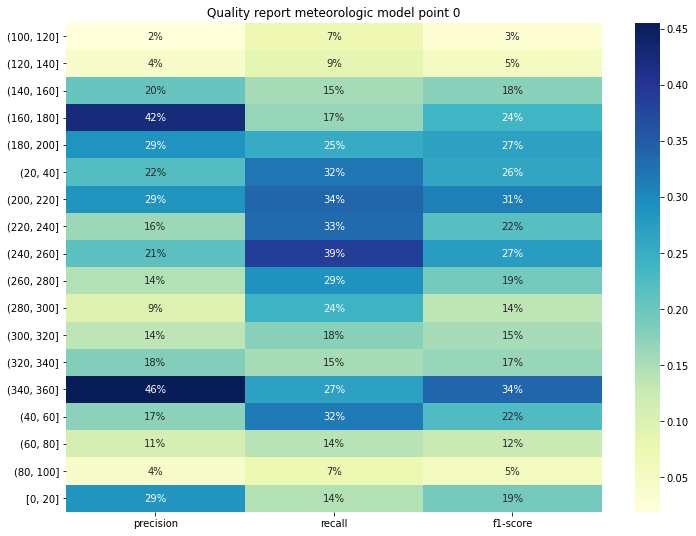

In [7]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

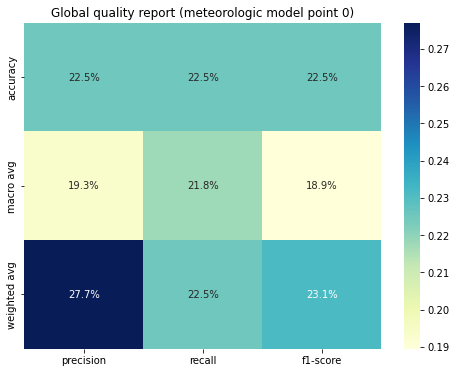

In [8]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

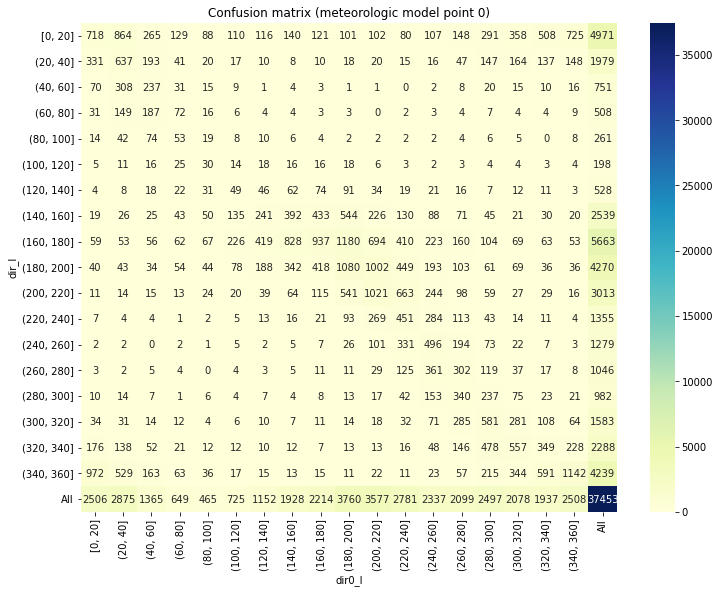

In [9]:
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

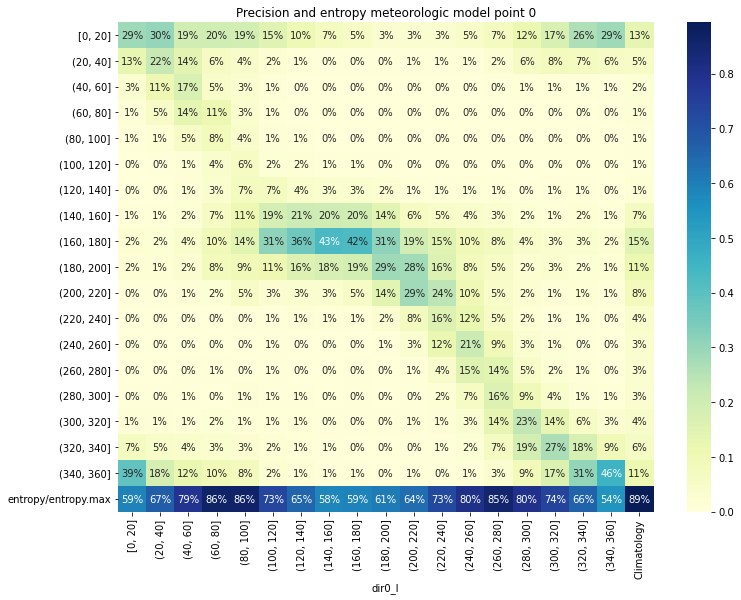

In [10]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**meteorological model score point 1**

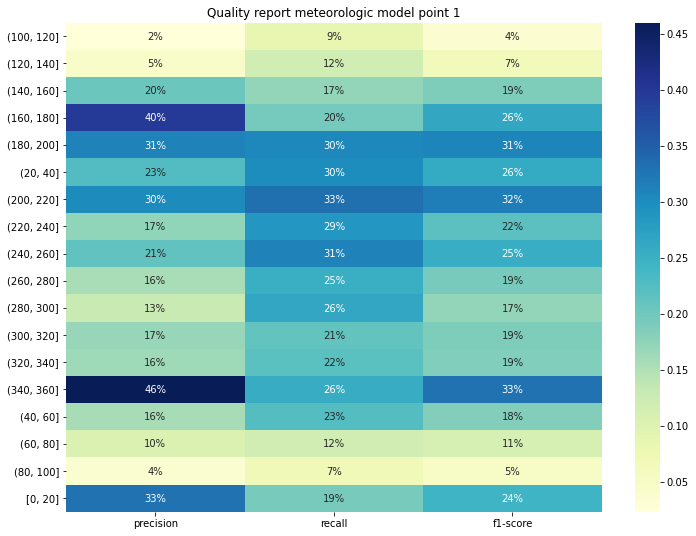

In [11]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 1")
cr=pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir1_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

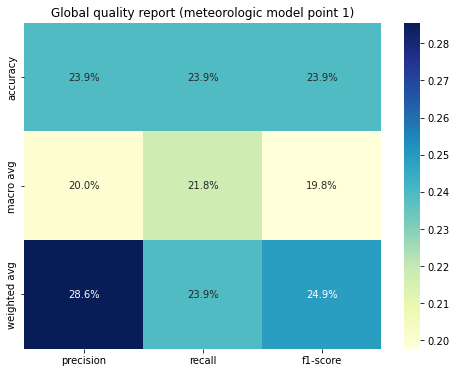

In [12]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 1)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

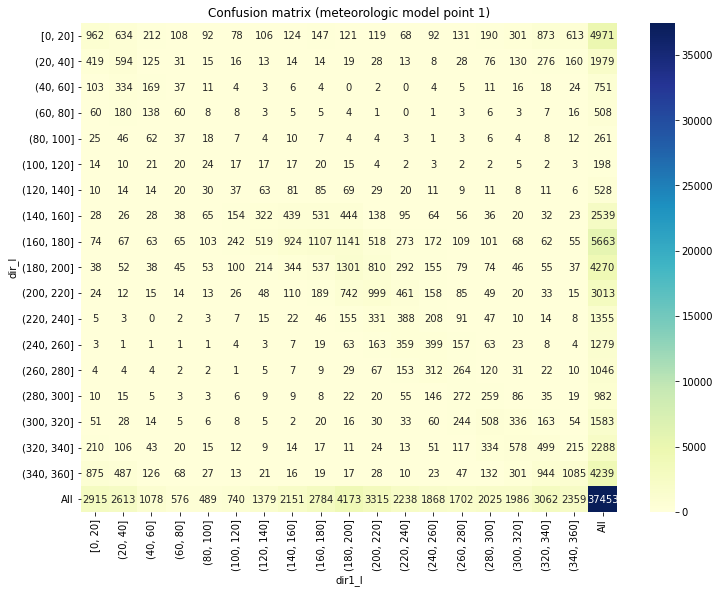

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 1)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir1_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

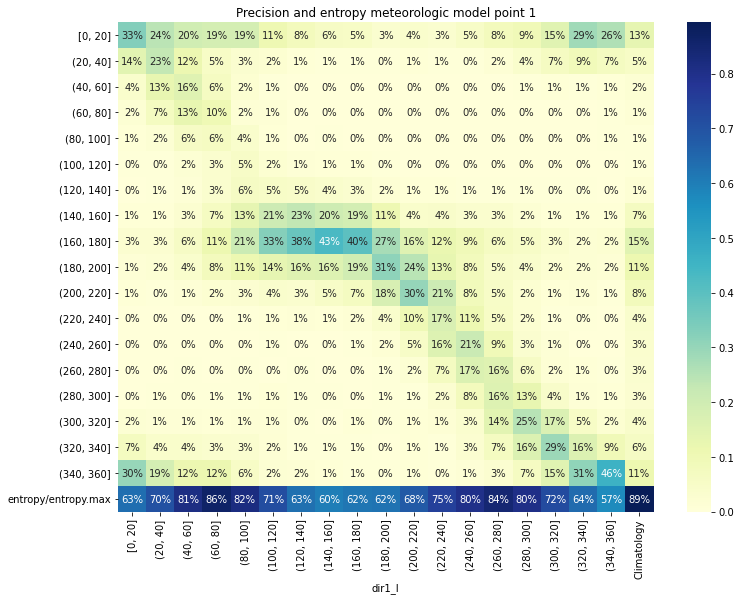

In [14]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 1")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir1_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**T test accuracy (2 samples) at point 0 and point 1. Best point 1. Significance level (alpha) = 0.01.
Test two sides and one side**

In [15]:
from sklearn.metrics import accuracy_score
import scipy.stats as stats

#Accuracy in 20 samples
concat = df_all1k[["dir_l","dir0_l","dir1_l"]]
acc_met0 = []
acc_met1 = []

for t in range (0,20):
  #sample lenght as y_test machine learning
  concat_t = concat.sample(2472)
  acc_met0.append(round(accuracy_score(concat_t["dir_l"], concat_t["dir0_l"]),2))
  acc_met1.append(round(accuracy_score(concat_t["dir_l"], concat_t["dir1_l"]),2))

print(pd.DataFrame(acc_met0,columns=["Accuracy point 0"]).describe()) 
print("\nAccuracy list point 0:") 
acc0 = np.around(acc_met0, decimals=2)
print(acc0)
print("****************")
print(pd.DataFrame(acc_met1,columns=["Accuracy point 1"]).describe()) 
print("\nAccuracy list point 1:") 
acc1 = np.around(acc_met1, decimals=2)
print(acc1)

#two samples t test two sides
alpha = 0.01
_,p_value=stats.ttest_ind(acc0,acc1,equal_var= False)

print("\nt test two samples two sides")
print("\np_value:",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0 accuracy mean point0= accuracy mean point 1")
    print("\nwe are accepting alternative hypothesis  accuracy mean point0 not equal accuracy mean point 1")
else:
    print("\nwe are accepting null hypothesis  H0 accuracy mean point0= accuracy mean point 1")

#two samples t test one side
#alternative hypothesis the mean of the distribution underlying the first sample is less than 
#the mean of the distribution underlying the second sample.

_,p_value=stats.ttest_ind(acc0,acc1,equal_var= False,alternative="less")

print("\nt test two samples one side")
print("\np_value:",p_value)
alpha = 0.01
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean point0= accuracy mean point 1")
    print("\nwe are accepting alternative hypothesis: accuracy mean point0 is less than accuracy mean point 1")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")



       Accuracy point 0
count         20.000000
mean           0.225000
std            0.007609
min            0.210000
25%            0.220000
50%            0.230000
75%            0.230000
max            0.240000

Accuracy list point 0:
[0.23 0.22 0.22 0.23 0.23 0.23 0.22 0.22 0.22 0.24 0.23 0.23 0.23 0.23
 0.22 0.21 0.21 0.22 0.23 0.23]
****************
       Accuracy point 1
count         20.000000
mean           0.236500
std            0.008751
min            0.220000
25%            0.230000
50%            0.235000
75%            0.240000
max            0.250000

Accuracy list point 1:
[0.24 0.24 0.24 0.24 0.23 0.24 0.22 0.23 0.23 0.25 0.25 0.23 0.25 0.25
 0.23 0.23 0.23 0.23 0.24 0.23]

t test two samples two sides

p_value: 7.855488044434511e-05

we are rejecting null hypothesis  H0 accuracy mean point0= accuracy mean point 1

we are accepting alternative hypothesis  accuracy mean point0 not equal accuracy mean point 1

t test two samples one side

p_value: 3.9277440222172555e

**Test association between observed variable and meteorological model (point 0) (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [16]:
#two way table
pd.crosstab(df_all1k.dir_l,df_all1k.dir0_l)

dir0_l,"[0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]","(100, 120]","(120, 140]","(140, 160]","(160, 180]","(180, 200]","(200, 220]","(220, 240]","(240, 260]","(260, 280]","(280, 300]","(300, 320]","(320, 340]","(340, 360]"
dir_l,,,,,,,,,,,,,,,,,,
"[0, 20]",718,864,265,129,88,110,116,140,121,101,102,80,107,148,291,358,508,725
"(20, 40]",331,637,193,41,20,17,10,8,10,18,20,15,16,47,147,164,137,148
"(40, 60]",70,308,237,31,15,9,1,4,3,1,1,0,2,8,20,15,10,16
"(60, 80]",31,149,187,72,16,6,4,4,3,3,0,2,3,4,7,4,4,9
"(80, 100]",14,42,74,53,19,8,10,6,4,2,2,2,2,4,6,5,0,8
"(100, 120]",5,11,16,25,30,14,18,16,16,18,6,3,2,3,4,4,3,4
"(120, 140]",4,8,18,22,31,49,46,62,74,91,34,19,21,16,7,12,11,3
"(140, 160]",19,26,25,43,50,135,241,392,433,544,226,130,88,71,45,21,30,20
"(160, 180]",59,53,56,62,67,226,419,828,937,1180,694,410,223,160,104,69,63,53


**All cells must be more than five!!!. No Chi square test posible**

In [17]:
from scipy.stats import chi2_contingency

alpha = 0.01

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(pd.crosstab(df_all1k.dir_l,df_all1k.dir0_l))

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables

print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between meteorological model variables and observed values")
else:
    print("Retain H0,There is no association between meteorological model variables and observed values")

p-value: 0.0
Significance level: 0.01
Degres of of freedom:  289
Stadistic 55207.457627156975
Reject H0,There is an association between meteorological model variables and observed values


In [18]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

**Machine learning**

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

 10%|█         | 3/29 [00:55<06:45, 15.61s/it]

In [ ]:
models

**Compare Machine learning accuracy vs meteorological model accuracy point 0 and 1.**


Confusion matrix  (Machine Learning)


Quality report (Machine Learning)

              precision    recall  f1-score    support
(100, 120]     0.666667  0.060606  0.111111    33.0000
(120, 140]     0.187500  0.040000  0.065934    75.0000
(140, 160]     0.310680  0.169312  0.219178   378.0000
(160, 180]     0.385141  0.550000  0.453039   820.0000
(180, 200]     0.387424  0.287218  0.329879   665.0000
(20, 40]       0.356164  0.255738  0.297710   305.0000
(200, 220]     0.351504  0.430876  0.387164   434.0000
(220, 240]     0.287037  0.156566  0.202614   198.0000
(240, 260]     0.308901  0.305699  0.307292   193.0000
(260, 280]     0.220472  0.200000  0.209738   140.0000
(280, 300]     0.337079  0.181818  0.236220   165.0000
(300, 320]     0.307263  0.230126  0.263158   239.0000
(320, 340]     0.362712  0.334375  0.347967   320.0000
(340, 360]     0.451852  0.501645  0.475448   608.0000
(40, 60]       0.344828  0.258621  0.295567   116.0000
(60, 80]       0.621622  0.302632  0.407080  

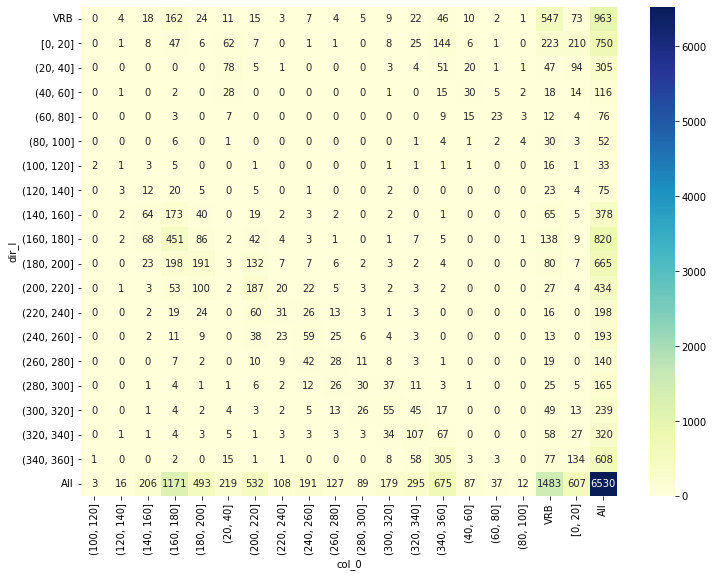

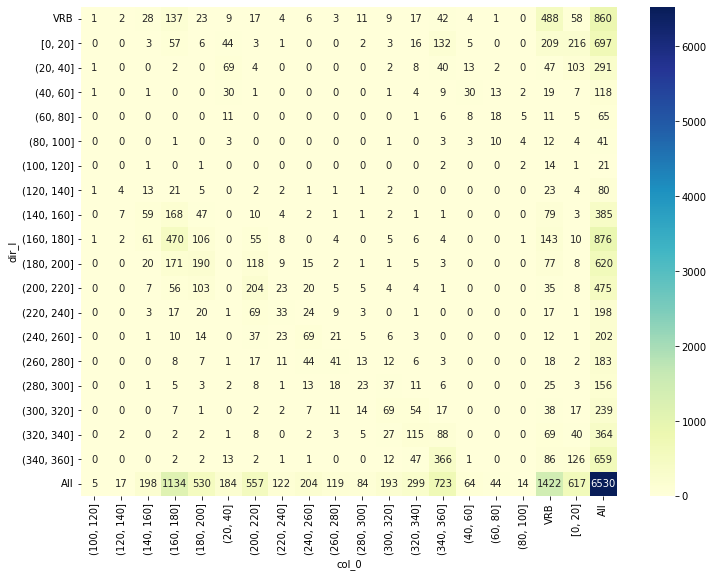

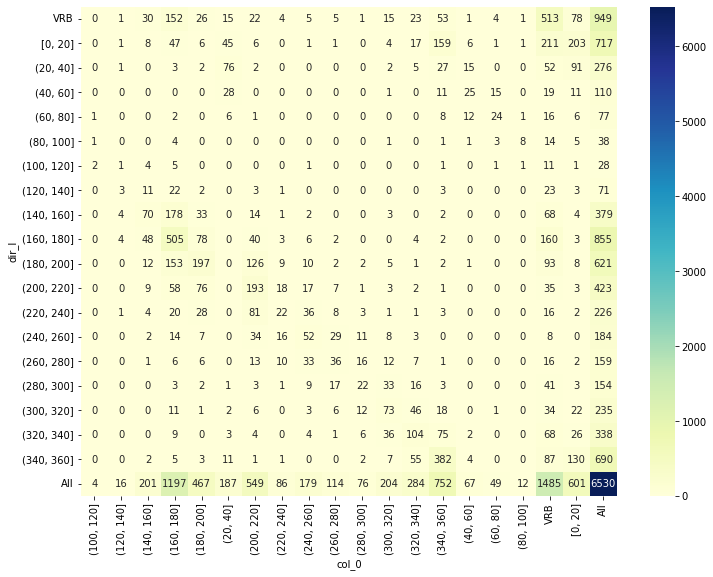

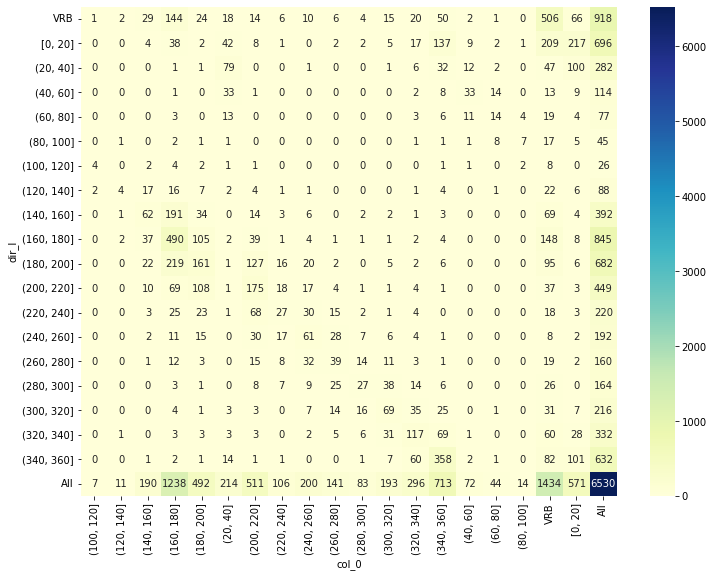

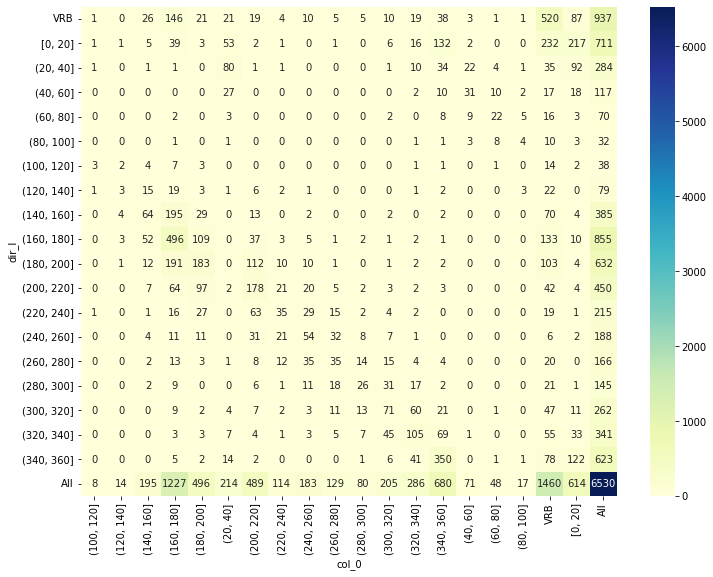

In [20]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\n accuracy mean of samples: ",acc_ml)



**T test (1sample) compare machine learning mean accuracy in a sample (n=5) versus meteorological model mean accuracy at point 0 (22.5%) and at point 1 (23.9%).
the alternative hypothesis is: the mean of the underlying distribution 
of the sample is greater than the given population mean (popmean). Significance level (alpha) = 0.01**

In [21]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(acc_ml, popmean=0.225, alternative="greater")
sta1, p_value1 = stats.ttest_1samp(acc_ml, popmean=0.239, alternative="greater")

print("\nalpha: ",alpha)

print("\naccuracy list from machine learning test:",acc_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")

print("\n**** Point 1 ****")
print("\np value point 1:",p_value1 )
if p_value1 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 1")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 1")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")    


alpha:  0.01

accuracy list from machine learning test: [0.37, 0.38, 0.38, 0.38, 0.38]

**** Point 0 ****

p_value point 0: 8.749453831903781e-08

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0

**** Point 1 ****

p value point 1: 1.2840527486178337e-07

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 1

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 1


In [22]:
#random seed control
y_test.head(20)

time
2021-08-29 16:00:00       [0, 20]
2020-09-12 03:00:00    (180, 200]
2020-12-28 14:00:00    (300, 320]
2022-08-31 17:00:00       [0, 20]
2022-08-03 01:00:00    (340, 360]
2020-12-23 23:00:00    (160, 180]
2020-03-30 17:00:00      (60, 80]
2022-04-05 23:00:00    (320, 340]
2018-03-23 10:00:00    (200, 220]
2019-02-02 16:00:00    (300, 320]
2019-01-21 00:00:00      (20, 40]
2019-09-01 00:00:00    (180, 200]
2019-02-10 18:00:00    (280, 300]
2022-01-24 23:00:00    (140, 160]
2019-07-16 06:00:00    (340, 360]
2022-04-20 20:00:00           VRB
2020-10-21 20:00:00    (140, 160]
2020-11-04 07:00:00    (140, 160]
2020-10-01 22:00:00    (280, 300]
2019-08-15 07:00:00       [0, 20]
Name: dir_l, dtype: category
Categories (19, object): ['VRB' < '[0, 20]' < '(20, 40]' < '(40, 60]' ... '(280, 300]' <
                          '(300, 320]' < '(320, 340]' < '(340, 360]']

**Add time variables**

In [23]:
df_vrb["hour"] = df_vrb.index.hour
df_vrb["month"] = df_vrb.index.month
df_vrb["dayofyear"] = df_vrb.index.dayofyear
df_vrb["weekofyear"] = df_vrb.index.isocalendar().week.astype(int)

In [24]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)


 Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.600000  0.090909  0.157895    33.000000
(120, 140]     0.071429  0.013333  0.022472    75.000000
(140, 160]     0.361502  0.203704  0.260575   378.000000
(160, 180]     0.393155  0.574390  0.466799   820.000000
(180, 200]     0.403397  0.285714  0.334507   665.000000
(20, 40]       0.383495  0.259016  0.309198   305.000000
(200, 220]     0.376648  0.460829  0.414508   434.000000
(220, 240]     0.271028  0.146465  0.190164   198.000000
(240, 260]     0.321244  0.321244  0.321244   193.000000
(260, 280]     0.230159  0.207143  0.218045   140.000000
(280, 300]     0.277108  0.139394  0.185484   165.000000
(300, 320]     0.350000  0.263598  0.300716   239.000000
(320, 340]     0.383387  0.375000  0.379147   320.000000
(340, 360]     0.464286  0.513158  0.487500   608.000000
(40, 60]       0.356322  0.267241  0.305419   116.000000
(60, 80]       0.558824  0.250000  0.345455    76.0

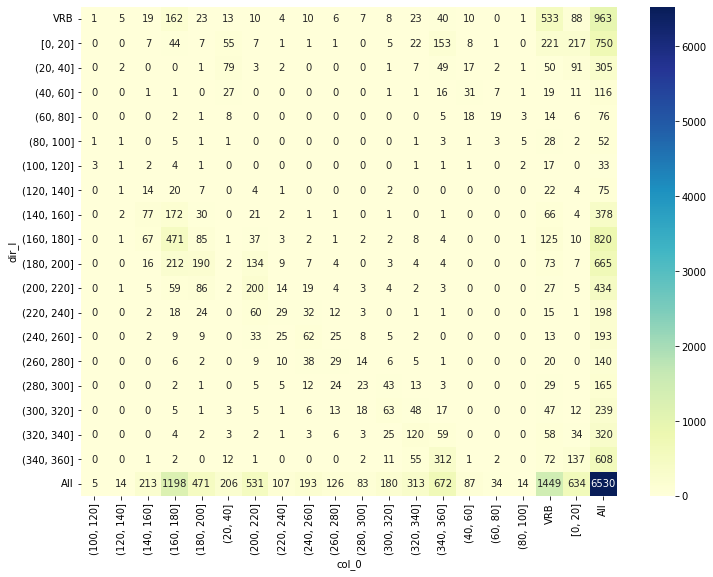

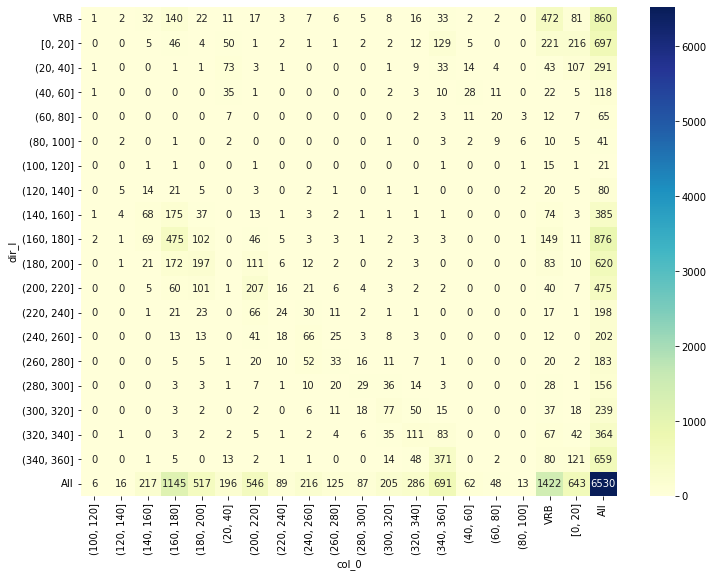

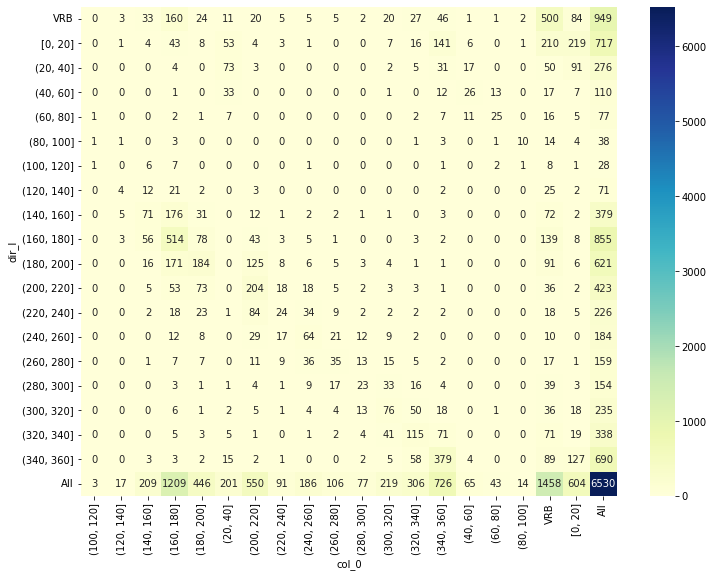

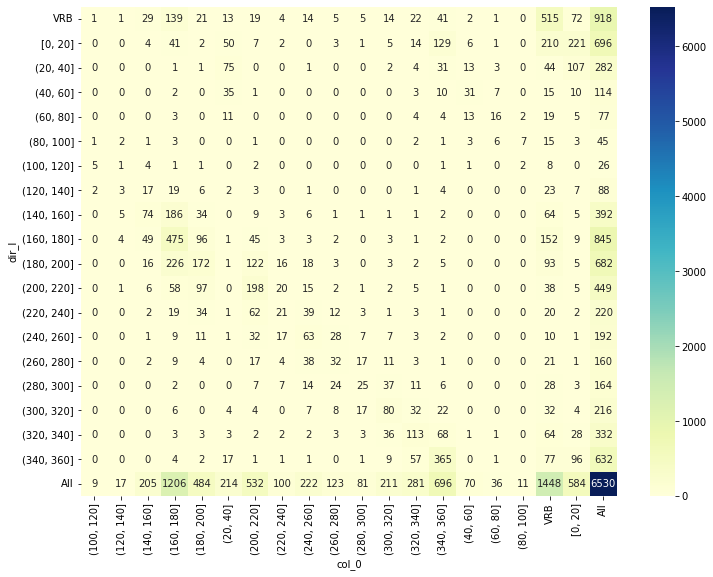

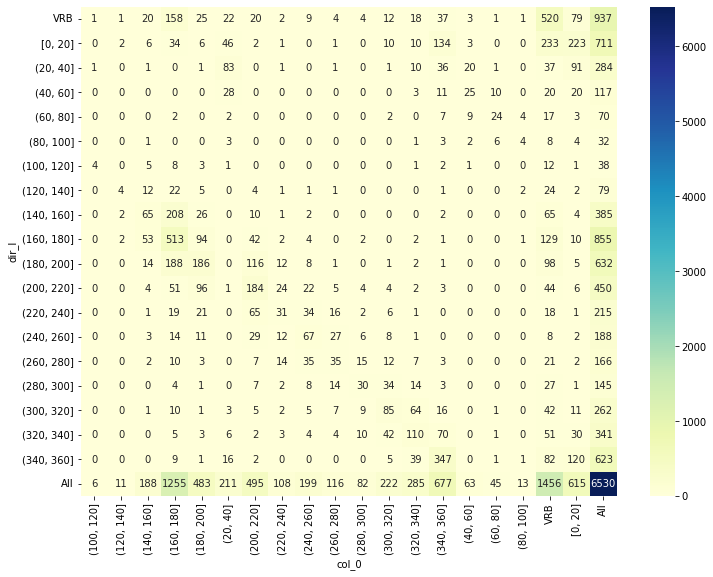

In [25]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

# mean accuracy machine learning sample after add time variables
acc_ml_a = []

# loop random
for t in range (0,5):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_a.append(round(accuracy_score(y_test, y_pred),2))

  #Confussion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\n Quality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nAccuracy mean of samples trained with time variables: ",acc_ml_a)

In [ ]:
#random seed control
y_test.head(20)

time
2021-07-05 06:00:00    (200, 220]
2021-08-28 02:00:00           VRB
2018-11-20 03:00:00           VRB
2020-01-31 12:00:00    (200, 220]
2021-12-13 18:00:00           VRB
2021-07-09 18:00:00    (320, 340]
2020-11-02 08:00:00    (300, 320]
2022-06-15 14:00:00      (60, 80]
2019-10-17 20:00:00    (200, 220]
2020-07-29 11:00:00    (340, 360]
2021-03-21 10:00:00    (340, 360]
2018-12-19 23:00:00    (180, 200]
2021-08-07 07:00:00    (240, 260]
2022-02-13 13:00:00    (200, 220]
2018-04-09 12:00:00    (340, 360]
2019-07-10 19:00:00           VRB
2018-04-11 09:00:00           VRB
2018-02-19 22:00:00       [0, 20]
2019-07-27 10:00:00       [0, 20]
2019-09-23 18:00:00    (180, 200]
Name: dir_l, dtype: category
Categories (19, object): ['VRB' < '[0, 20]' < '(20, 40]' < '(40, 60]' ... '(280, 300]' <
                          '(300, 320]' < '(320, 340]' < '(340, 360]']

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [26]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_a, alternative="less")

print("\nmeans without time variables:", acc_ml)
print("\nmeans with time variables:", acc_ml_a)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the mean of the sample without time variables inputs is less than the mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables ")




means without time variables: [0.37, 0.38, 0.38, 0.38, 0.38]

means with time variables: [0.38, 0.38, 0.39, 0.38, 0.39]

alpha:  0.01

p_value point:  0.03524199845510997

we are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables 


In [27]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

In [28]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("dir_LECO_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
